請完成以下兩題（section 4 和 5）

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Random-data-for-training" data-toc-modified-id="Random-data-for-training-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random data for training</a></span></li><li><span><a href="#Batch-Gradient-Descent" data-toc-modified-id="Batch-Gradient-Descent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Batch Gradient Descent</a></span></li><li><span><a href="#Stochastic-GD" data-toc-modified-id="Stochastic-GD-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stochastic GD</a></span></li><li><span><a href="#Mini-batch-GD" data-toc-modified-id="Mini-batch-GD-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mini-batch GD</a></span></li></ul></div>

# Summary 

The model is a linear model as followed:
$$
\text{predicted} \ y = f(x; w, b) = w x + b
$$

MSE loss function:
$$
\text{Loss}(x, y; w, b) = \frac{1}{2} (w x + b - y)^{2}
$$

TrainLoss (TotalLoss)
$$
\text{TrainLoss}(w, b) = \frac{1}{|\mathcal{D}|} \sum_{\mathcal{D}} \text{Loss}(x, y; w, b)
$$

Gradient Descent (learning rule):
$$
w \to w - \alpha \ \nabla_{w} \text{TrainLoss}(w, b) \\
b \to b - \alpha \ \nabla_{b} \text{TrainLoss}(w, b)
$$

Gradient of trainLoss:
$$
\nabla_{w} \text{TrainLoss}(w, b) = \frac{1}{|\mathcal{D}|} \sum_{\mathcal{D}} (wx + b - y) x \\
\nabla_{b} \text{TrainLoss}(w, b) = \frac{1}{|\mathcal{D}|} \sum_{\mathcal{D}} (wx + b - y)
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Random data for training

In what follows we generate random data with *three* features

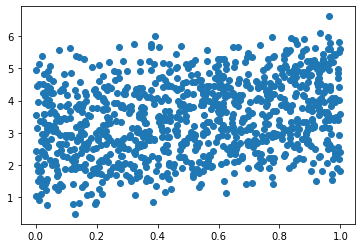

In [2]:
n = 1000
true_w = np.array([1, 2, 3])
xx = np.random.rand(n, len(true_w))
yy = xx.dot(true_w) + np.random.rand(len(xx))
points = list(zip(xx, yy))
plt.scatter(xx[:, 0], yy)

# Batch Gradient Descent

In [3]:
%%time

def tl(w, b):
    return sum([(w.dot(x) + b - y)**2 * 0.5 for x, y in points]) / len(points)

def dtl_w(w, b):
    return sum([(w.dot(x) + b - y) * x for x, y in points]) / len(points)

def dtl_b(w, b):
    return sum([(w.dot(x) + b - y) for x, y in points]) / len(points)

# Initializing hyperparameters
repeat = 10000
w = np.zeros(3)
b = np.zeros(1)
alpha = 0.01

# Learning loop
for i in range(repeat+1):
    loss = tl(w, b)
    loss_gradient_w = dtl_w(w, b)
    loss_gradient_b = dtl_b(w, b)
    w += - alpha * loss_gradient_w
    b += - alpha * loss_gradient_b
    if i % 1000 == 0:
        print(f'Iteration = {i}: {loss=}, {w=}, {b=}')

Iteration = 0: loss=array([6.62867935]), w=array([0.01846171, 0.01876494, 0.01946945]), b=array([0.03452232])
Iteration = 1000: loss=array([0.1060304]), w=array([0.8310629 , 1.40878635, 2.01377716]), b=array([1.401759])
Iteration = 2000: loss=array([0.06223394]), w=array([0.79304986, 1.64452617, 2.50506087]), b=array([1.04804969])
Iteration = 3000: loss=array([0.04889434]), w=array([0.81319991, 1.78911389, 2.75508146]), b=array([0.83412638])
Iteration = 4000: loss=array([0.04453562]), w=array([0.8436011 , 1.87696315, 2.88615639]), b=array([0.7051046])
Iteration = 5000: loss=array([0.04304863]), w=array([0.86964373, 1.93002666, 2.95678162]), b=array([0.62744065])
Iteration = 6000: loss=array([0.04252891]), w=array([0.88859111, 1.96196188, 2.99575692]), b=array([0.58075572])
Iteration = 7000: loss=array([0.04234491]), w=array([0.90137224, 1.98113848, 3.01769857]), b=array([0.55272015])
Iteration = 8000: loss=array([0.04227932]), w=array([0.90964066, 1.99263825, 3.03024928]), b=array([0.5

# Stochastic GD

【50分】請在下方 cell 把 Batch GD 方法改寫成 SGD

In [43]:
%%time

import random

def SGDTrain(datasets, learningRate, minLoss, maxTimes):
    weight = np.zeros(3)
    bias = np.zeros(1)
    loss = tl(weight, bias)
    for times in range(maxTimes):
        x, y = datasets[random.randint(0, len(datasets) - 1)]
        loss_gradient_w = ((weight.dot(x) + bias - y) * x)
        loss_gradient_b = (weight.dot(x) + bias - y)
        weightTemp = weight - loss_gradient_w * learningRate
        biasTemp = bias - loss_gradient_b * learningRate
        lossTemp = tl(weightTemp, biasTemp)
        if lossTemp <= minLoss:  # 损失足够小时跳出
            weight = weightTemp
            bias = biasTemp
            loss = lossTemp
            print(f'Iteration = {times}: {loss=}, {weight=}, {bias=}')
            break
        elif loss > lossTemp:  # 更新权重、偏置、当前最小损失
            weight = weightTemp
            bias = biasTemp
            loss = lossTemp
        if times % 1000 == 0:
            print(f'Iteration = {times}: {loss=}, {weight=}, {bias=}')
    return weight, bias

SGDTrain(points, learningRate=0.01, minLoss=0.043, maxTimes=10000)

Iteration = 0: loss=array([6.37570962]), weight=array([0.03242022, 0.0083795 , 0.02401246]), bias=array([0.03859178])
Iteration = 1000: loss=array([0.12365193]), weight=array([0.8739237 , 1.32584716, 1.86857188]), bias=array([1.48194303])
Iteration = 2000: loss=array([0.07107325]), weight=array([0.81112317, 1.54429271, 2.40051953]), bias=array([1.14164824])
Iteration = 3000: loss=array([0.05412417]), weight=array([0.78049098, 1.70591653, 2.65880109]), bias=array([0.94013958])
Iteration = 4000: loss=array([0.04743767]), weight=array([0.8002795 , 1.79173673, 2.82266566]), bias=array([0.80584668])
Iteration = 5000: loss=array([0.04431661]), weight=array([0.83224112, 1.87854352, 2.90869606]), bias=array([0.69965085])
Iteration = 6000: loss=array([0.04334219]), weight=array([0.84620447, 1.92121062, 2.94557859]), bias=array([0.64524382])
Iteration = 6637: loss=array([0.04299537]), weight=array([0.86665351, 1.93186614, 2.96548795]), bias=array([0.62544366])
Wall time: 33.2 s


(array([0.86665351, 1.93186614, 2.96548795]), array([0.62544366]))

# Mini-batch GD

【50分】請在下方 cell 把 Batch GD 方法改寫成 Mini-batch GD（把原數據集 `points` 分成10個 mini-Batch）

In [50]:
%%time

def MBGDdtl_w(w, b, batch):
    return sum([(w.dot(x) + b - y) * x for x, y in batch]) / len(batch)

def MBGDdtl_b(w, b, batch):
    return sum([(w.dot(x) + b - y) for x, y in batch]) / len(batch)

def MBGDTrain(datasets, learningRate, minLoss, maxTimes, batchSize):
    weight = np.zeros(3)
    bias = np.zeros(1)
    loss = tl(weight, bias)
    for times in range(maxTimes):
        for eachBatch in range(int(len(points) / batchSize)):
            startIndex = eachBatch * batchSize
            endIndex = startIndex + batchSize
            batch = datasets[startIndex:endIndex]
            loss_gradient_w = MBGDdtl_w(weight, bias, batch)
            loss_gradient_b = MBGDdtl_b(weight, bias, batch)
            weightTemp = weight - loss_gradient_w * learningRate
            biasTemp = bias - loss_gradient_b * learningRate
            lossTemp = tl(weightTemp, biasTemp)
            if lossTemp <= minLoss:  # 损失足够小时跳出
                weight = weightTemp
                bias = biasTemp
                loss = lossTemp
                print(f'Iteration = {times}: {loss=}, {weight=}, {bias=}')
                return weight, bias
            elif loss > lossTemp:  # 更新权重、偏置、当前最小损失
                weight = weightTemp
                bias = biasTemp
                loss = lossTemp
        if times % 10 == 0:
            print(f'Iteration = {times}: {loss=}, {weight=}, {bias=}')
    return weight, bias

MBGDTrain(points, learningRate=0.01, minLoss=0.043, maxTimes=10000, batchSize=10)

Iteration = 0: loss=array([0.41355723]), weight=array([0.84804033, 0.89986848, 0.98015753]), bias=array([1.58817966])
Iteration = 10: loss=array([0.10046053]), weight=array([0.82205668, 1.42995215, 2.06508406]), bias=array([1.37027779])
Iteration = 20: loss=array([0.06137259]), weight=array([0.78935815, 1.65314125, 2.51683873]), bias=array([1.0373006])
Iteration = 30: loss=array([0.04910334]), weight=array([0.80196047, 1.78663679, 2.75233059]), bias=array([0.84006903])
Iteration = 40: loss=array([0.04488081]), weight=array([0.8264184 , 1.8687655 , 2.87869727]), bias=array([0.72043523])
Iteration = 50: loss=array([0.04324487]), weight=array([0.85433474, 1.91773861, 2.95448463]), bias=array([0.64125477])
Iteration = 53: loss=array([0.04299952]), weight=array([0.86220384, 1.92942473, 2.96886455]), bias=array([0.62509463])
Wall time: 27.7 s


(array([0.86220384, 1.92942473, 2.96886455]), array([0.62509463]))